In [57]:
#importing libraries for data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#importing libraties for machiene learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing  import StandardScaler
from sklearn.preprocessing import LabelEncoder

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#full displçay of columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)



## IMPORTING OUR 'CONSUMER ELETRONIC SALES DATASET'


In [58]:
df = pd.read_csv("/kaggle/input/consumer-electronics-sales-dataset/consumer_electronics_sales_data.csv")

## Check the data set


In [59]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [60]:
df.tail()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
8995,14869,Smart Watches,Samsung,1041.149163,36,1,16,4,0
8996,14870,Smartphones,Samsung,1485.694311,57,0,5,1,1
8997,14871,Headphones,Samsung,2887.369597,28,0,18,4,0
8998,14872,Tablets,HP,1490.453964,38,0,4,2,1
8999,14873,Smartphones,Sony,2315.583087,62,0,15,2,1


# EXPLORATORY DATA ANALYSIS (EDA)

## SHAPE OF DATA


In [61]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} colomns.") 

The dataset has 9000 rows and 9 colomns.


## INFO OF DATASET


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


## DESCRIPTIVE ANALYSIS


In [63]:
df.describe()

,ProductID,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,10373.500000,1527.429195,43.347000,0.508889,10.054667,2.996000,0.566444
std,2598.220545,829.900898,15.055084,0.499949,5.461328,1.405301,0.495593
min,5874.000000,100.376358,18.000000,0.000000,1.000000,1.000000,0.000000
25%,8123.750000,809.165014,30.000000,0.000000,5.000000,2.000000,0.000000
50%,10373.500000,1513.024577,43.000000,1.000000,10.000000,3.000000,1.000000
75%,12623.250000,2244.415520,56.000000,1.000000,15.000000,4.000000,1.000000
max,14873.000000,2999.852253,69.000000,1.000000,19.000000,5.000000,1.000000


* `Product Price:`
  * Minimum: 100.38
  * Maximum: 2999.85
  * Average: 1527.43
  
* `Customer Age:`
  * Minimum: 18
  * Maximum: 69
  * Average: 43.35
  
* `Purchase Frequency:`
  * Minimum: 1
  * Maximum: 19
  * Average: 10.1
  
* `Customer Satisfaction:`
  * Minimum: 1
  * Maximum: 5
  * Average: 2.99

## MISSING VALUES

In [64]:

df.isnull().sum()

ProductID               0
ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

## DUPLICATES

In [65]:
df.duplicated().sum()

0

## VISUALIZATION

In [66]:
df.columns

Index(['ProductID', 'ProductCategory', 'ProductBrand', 'ProductPrice', 'CustomerAge', 'CustomerGender', 'PurchaseFrequency', 'CustomerSatisfaction', 'PurchaseIntent'], dtype='object')

In [67]:
#PRODUCT CATEGORY
plt = px.histogram(df, x='ProductCategory', title="Product Category Distribution", color_discrete_sequence=px.colors.sequential.Cividis)
plt.show()

* We've 5 Product Categories:
  * 1. Smart Phones
  * 2. Smart Watches
  * 3. Taplets
  * 4. Laptops
  * 5. Headphones

## BRANDS

In [68]:
plt = px.histogram(df, x="ProductBrand", title="Product Brand Dristribution", color_discrete_sequence=px.colors.sequential.Aggrnyl)
plt.show()

* We've 4 Brands and 1 is Other Brands:
  * 1. Samsung
  * 2. Sony
  * 3. HP
  * 4. Apple

## PRICE DISTRIBUTION

In [69]:
plt = px.histogram(df, x='ProductPrice', title='Product Price Distribution', color_discrete_sequence=px.colors.sequential.Agsunset)
plt.show()

* Product Price Range: 100.38 - 2999.85
* Products are in Expensive Range.

## AGE DISTRIBUTION

In [70]:
plt = px.histogram(df, x='CustomerAge', title='Customer Age Distribution', color_discrete_sequence=px.colors.sequential.Bluered)
plt.show()

* Age range is 18 - 69

## GENDER DISTRIBUTION

In [71]:
plt = px.pie(df, names='CustomerGender', title='Customer Gender Distribution', color_discrete_sequence=px.colors.sequential.Turbo_r)
plt.show()

* 0 - Male (49.1%)
* 1 - Female (50.9%)

## PURCHASE FREQUENCY DISTRIBUTION

In [72]:
plt = px.histogram(df,x = 'PurchaseFrequency', title='Purchase Frequency Distribution', color_discrete_sequence=px.colors.sequential.haline)
plt.show()

The Range is 1 - 19

## CUSTOMER SATISFACTION DISTRIBUTION

In [73]:
plt = px.histogram(df, x='CustomerSatisfaction', title='Customer SatisfactionDistribution', color_discrete_sequence=px.colors.sequential.Viridis)
plt.show()

* Range is 1 - 5 and average is 3

## PURCHASE INTENT (TARGET VARIABLE) DISTRIBUTION

In [74]:
plt = px.pie(df, names = 'PurchaseIntent', title='Purchase Intent Distributon', color_discrete_sequence = px.colors.sequential.Mint)
plt.show()

We've `0 and 1` which means `Not Purchase` and `Purchase`.

A binary classification problem.

`0: Not Purchase --> 43.4%`

`1: Purchase --> 56.6%`

<h2 style="color: #9ABA49;text-align: center;"> MULTI-VARIATE ANALYSIS</h2>

## Ploting Each Variable Against Target Variable

In [75]:
for col in df.columns:
    plt = px.histogram(df, x=col, color='PurchaseIntent', title=f"{col} Distribution", color_discrete_sequence=px.colors.sequential.Blackbody)
    plt.show()

#### Based on the above ploting of columns against Target Variable

Mosly People From Age 18 to 30 don't purchase maybe due to high price.

Females are the most buyers.

Customer Satisfaction with 4 and 5 are mostly tends to buy.




# PRODUCT VS BRANDS

Let's check Products by Brands to see the distribution.

In [76]:
plt = px.histogram(df, x='ProductCategory', color ='ProductBrand', title='Product Category and Brands Distribution', color_discrete_sequence=px.colors.sequential.Blackbody_r)
plt.show()

# PRODUCT VS PRICE

Product Vs Price is to check the distribution of price.

In [77]:
plt = px.histogram(df, x='ProductPrice', color='ProductCategory', title='Product Category and Price Distribution', color_discrete_sequence=px.colors.sequential.Blackbody)
plt.show()

# BRANDS VS PRICE

Let's check products by brands to see the distribuition

In [78]:
plt = px.histogram(df, x='ProductPrice', color ='ProductBrand', title = 'Product Category and Price Distribution', color_discrete_sequence=px.colors.sequential.Blackbody)
plt.show()

All brands offer the almost same price range.

## AGE vs PRODUCT CATEGORY and PRICE

In [79]:
plt = px.histogram(df, x = 'CustomerAge', y = 'ProductPrice', color = 'ProductCategory', title='Customer Age Product Category Distribution')
plt.show()

Based on the above figure, customers from all age group buy all the products available in this dataset, which means that age does not matter.

## HEATMAP | CORRELATION MATRIX

Some of the features are categorical ad some are numerical. So, we need to encode them.

### ENCODING CATEGORICAL DATA

In [80]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [81]:
le = LabelEncoder()
df['ProductCategory'] = le.fit_transform(df['ProductCategory'])
df['ProductBrand'] = le.fit_transform(df['ProductBrand'])

In [82]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,3,2,312.949668,18,0,2,1,0
1,5875,2,3,980.389404,35,1,7,2,1
2,5876,4,3,2606.718293,63,0,1,5,1
3,5877,3,3,870.395450,63,1,10,3,1
4,5878,4,4,1798.955875,57,0,17,3,0


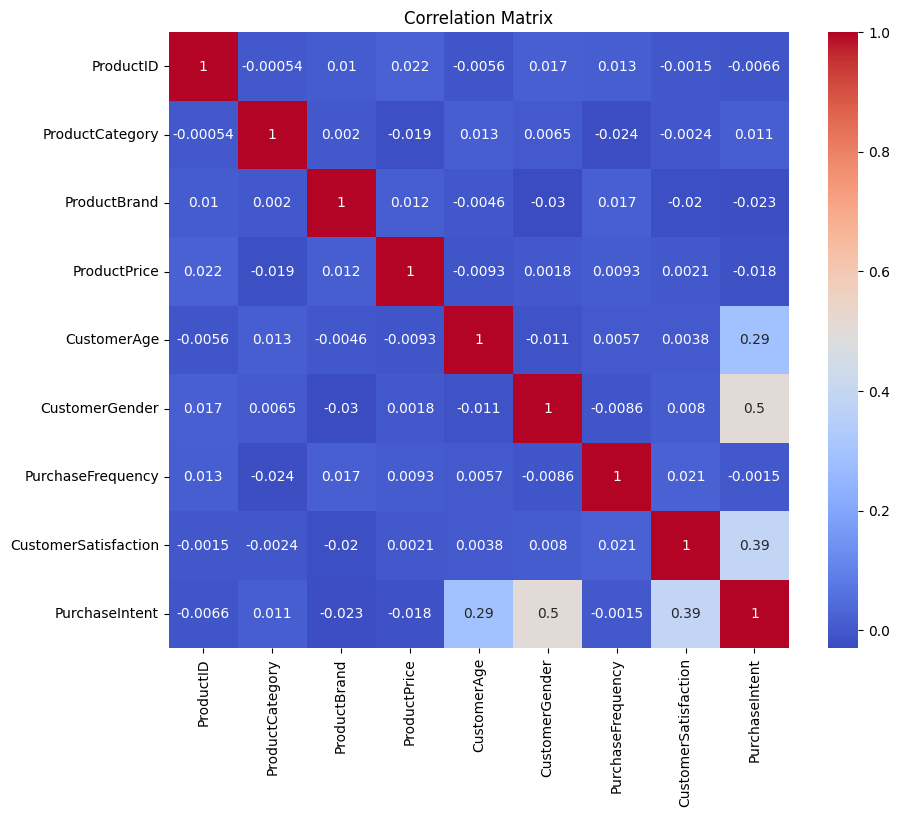

In [83]:
import matplotlib.pyplot as plt
#Correlation matrix and heatmap
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Correlation is a statistical measure that indicates the strength and direction of mthe linear relationship between two variables:

-1: Perfect negatie correlation (as one variabel increses, the other decreases)


0: Nocorrelation (independent variables)


1: Perfect positive correlation( as one variabel increases, the other increases)

<h2 style="color: #4CAF50;text-align: center;"> Machine Learning Model</h2>

## SPLIT DATA INFO FEATURES AND TARGET

ProductID don´t affect the target variable. So, we can drop it in features selection.

In [84]:
X = df.drop(['ProductID', 'PurchaseIntent'], axis=1)
y = df['PurchaseIntent']

## SPLIT DATA INTO TRAINING AND TEST SETS

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## SCALIGN THE DATA

In [86]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## MODEL BUILDING

In [87]:
#Models

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'CatBoost Classifier': CatBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}


#Trainig the model

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")
    
print("########################################################")


#Evaluate the models
model_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_scores[name]= {
        'MSE':mse,
        'R2': r2
    }
    print(f"{name} MSE: {mse:.2f}, R2: {r2:.2f}")
    
#Find the best model
best_model_name = max(model_scores, key=lambda x: model_scores[x]['R2'])
best_model_score = model_scores[best_model_name]['R2']
print(f"Best Model: {best_model_name} with R2: {best_model_score:.2f}")


Linear Regression trained.
Random Forest trained.
Decision Tree trained.
Gradient Boosting trained.
Learning rate set to 0.023934
0:	learn: 0.6610107	total: 2.79ms	remaining: 2.78s
1:	learn: 0.6305307	total: 6.28ms	remaining: 3.13s
2:	learn: 0.6039513	total: 9.46ms	remaining: 3.15s
3:	learn: 0.5774311	total: 12.7ms	remaining: 3.16s
4:	learn: 0.5526912	total: 15.3ms	remaining: 3.04s
5:	learn: 0.5305021	total: 18.6ms	remaining: 3.07s
6:	learn: 0.5081070	total: 21.8ms	remaining: 3.09s
7:	learn: 0.4878828	total: 24.3ms	remaining: 3.02s
8:	learn: 0.4689585	total: 27.1ms	remaining: 2.98s
9:	learn: 0.4511295	total: 30.3ms	remaining: 3s
10:	learn: 0.4345934	total: 32.8ms	remaining: 2.95s
11:	learn: 0.4191657	total: 35.3ms	remaining: 2.91s
12:	learn: 0.4055207	total: 37.8ms	remaining: 2.87s
13:	learn: 0.3920087	total: 41.1ms	remaining: 2.89s
14:	learn: 0.3791286	total: 44.3ms	remaining: 2.91s
15:	learn: 0.3672279	total: 47.4ms	remaining: 2.91s
16:	learn: 0.3560543	total: 50.7ms	remaining: 2.93s

# SAME RESULTS

1. Random Forest MSE: 0.05, R2: 0.81

2. Gradient Boosting MSE: 0.05, R2: 0.81

3. CatBoost Classifier MSE: 0.05, R2: 0.81

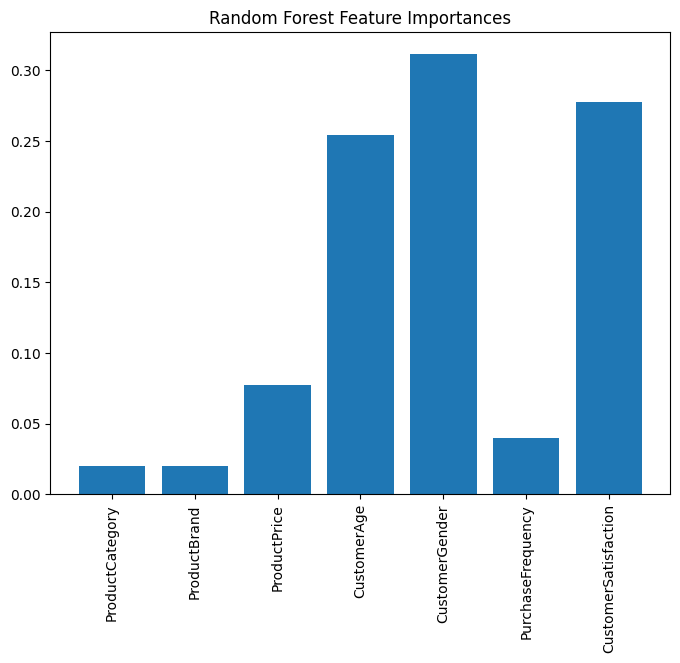

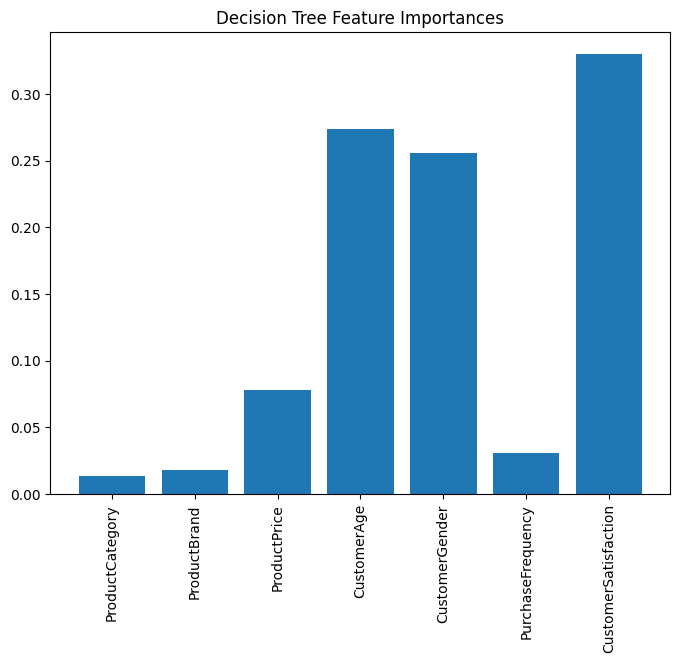

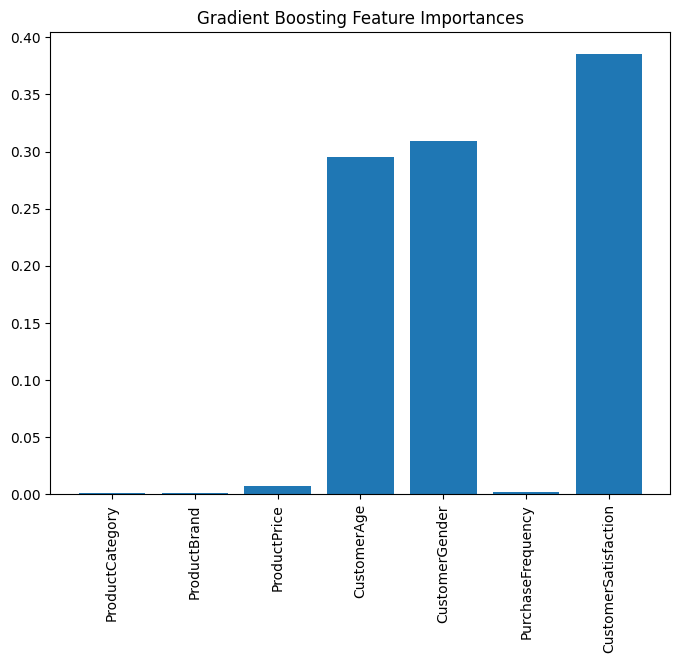

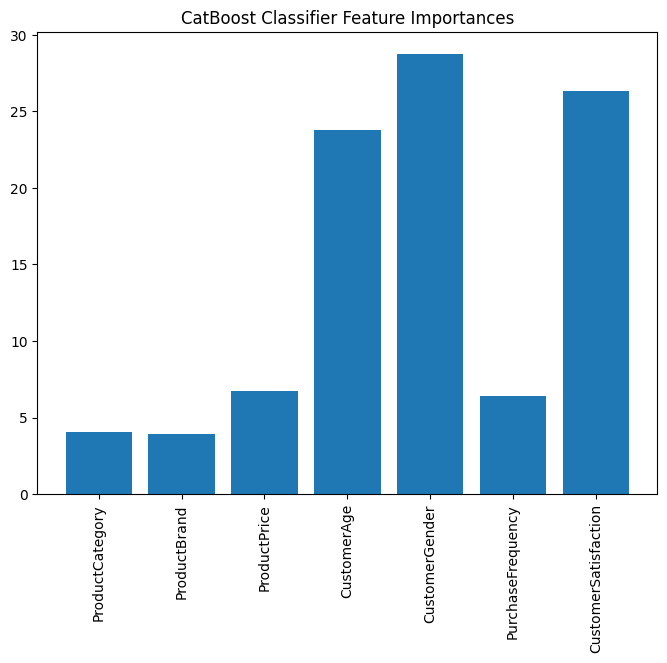

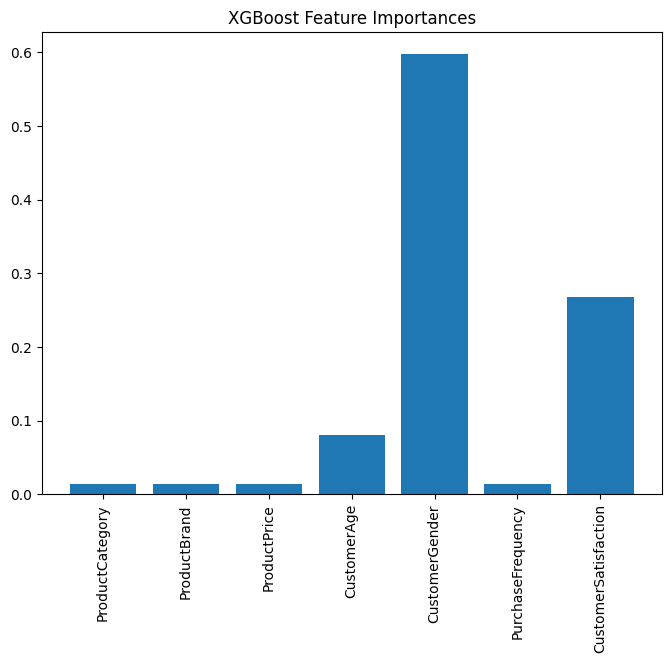

In [88]:
import matplotlib.pyplot as plt

for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        plt.figure(figsize= (8,6))
        plt.bar(range(len(feature_importances)), feature_importances)
        plt.xticks(range(len(feature_importances)), X.columns, rotation=90)
        plt.title(f'{name} Feature Importances')
        plt.show()

## WITH PARAMETERS

In [89]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestClassifier(max_depth =5, n_estimators=50, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, random_state=42),
    'CatBoost Classifier': CatBoostClassifier(n_estimators=100, depth=5, learning_rate=0.1, random_state=42),
    'XGBoost': XGBClassifier(n_estimator=100, random_state=42)
    }

#Training model

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

print("######################################################")

#Models and the evaluate
model_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_scores[name] = {
        'MSE': mse,
        'R2': r2
    }
    print(f'{name} MSE: {mse:.2f}, R2: {r2:.2f}')
    
#Finde the best model
best_model_name = max(model_scores, key = lambda x: model_scores[x]['R2'])
best_model_score = model_scores[best_model_name]['R2']
print(f'Best model: {best_model_name} with R2:{best_model_score:.2f}')
    

Linear Regression trained.
Random Forest trained.
Decision Tree trained.
Gradient Boosting trained.
0:	learn: 0.6159974	total: 1.55ms	remaining: 153ms
1:	learn: 0.5539922	total: 3.13ms	remaining: 154ms
2:	learn: 0.5025690	total: 4.72ms	remaining: 153ms
3:	learn: 0.4586838	total: 6.28ms	remaining: 151ms
4:	learn: 0.4213038	total: 7.81ms	remaining: 148ms
5:	learn: 0.3899633	total: 9.3ms	remaining: 146ms
6:	learn: 0.3625088	total: 10.9ms	remaining: 145ms
7:	learn: 0.3386396	total: 12.3ms	remaining: 141ms
8:	learn: 0.3187079	total: 13.8ms	remaining: 140ms
9:	learn: 0.3008280	total: 15ms	remaining: 135ms
10:	learn: 0.2856625	total: 17.3ms	remaining: 140ms
11:	learn: 0.2732338	total: 18.8ms	remaining: 138ms
12:	learn: 0.2617459	total: 20.4ms	remaining: 136ms
13:	learn: 0.2517772	total: 21.8ms	remaining: 134ms
14:	learn: 0.2429919	total: 23.4ms	remaining: 132ms
15:	learn: 0.2356462	total: 24.8ms	remaining: 130ms
16:	learn: 0.2292605	total: 26.6ms	remaining: 130ms
17:	learn: 0.2238238	total: 2

## FEATURE ENGINEERING

I will do the feature engineering in to check if it increase the model performing score.


In [90]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,3,2,312.949668,18,0,2,1,0
1,5875,2,3,980.389404,35,1,7,2,1
2,5876,4,3,2606.718293,63,0,1,5,1
3,5877,3,3,870.395450,63,1,10,3,1
4,5878,4,4,1798.955875,57,0,17,3,0


## PRODUCT PRICE BINNING

In [91]:
df['ProductPriceBucket'] = pd.cut(df['ProductPrice'], bins=[100, 500, 1000, 1500, 2000, 3000], labels=['Very low', 'low', 'Medium', 'High', 'Very High'])

In [92]:
plt = px.histogram(df, x='ProductPriceBucket', title='Product Price Distribution', color_discrete_sequence=px.colors.sequential.ice)
plt.show()

## AGE BINNING

In [93]:
df['CustomerAgeGroup'] = pd.qcut(df['CustomerAge'], q=4, labels=['Young', 'Middle-aged', 'Mature', 'Senior'])

In [94]:
plt = px.histogram(df, x='CustomerAgeGroup', title='Customer Age Distribution', color_discrete_sequence=px.colors.sequential.Blackbody)
plt.show()

## PURCHASE FREQUENCY BINNING

In [95]:
df['PurchaseFrequencyGroup'] = pd.qcut(df['PurchaseFrequency'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [96]:
plt = px.histogram(df, x='PurchaseFrequencyGroup', title='Purchase Frequency Distribution', color_discrete_sequence=px.colors.sequential.thermal_r)
plt.show()

## CUSTOMER SATISFACTION BINING

In [97]:
df['CustomerSatisfactionGroup'] = pd.qcut(df['CustomerSatisfaction'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [98]:
plt = px.histogram(df, x='CustomerSatisfactionGroup', color_discrete_sequence=px.colors.sequential.Sunset)
plt.show()

## Exploring the Relationship between Customer Satisfaction and Purchase Frequency

To better understand the relationship between customer satisfaction and purchase frequency, I decided to create a new interaction feature called CustomerSatisfaction_PurchaseFrequency. This new feature captures the combined effect of a customer's satisfaction level and their purchase frequency.

* Rationale Behind Creating the New Feature

The motivation for creating this interaction feature is to investigate whether there is a significant relationship between customer satisfaction levels and the frequency of their purchases.


* Hypothesis

The hypothesis is that customers with high satisfaction levels tend to make purchases more frequently, while customers with low satisfaction levels might make purchases less frequently. By multiplying the variables CustomerSatisfaction and PurchaseFrequency, it is possible to identify patterns and trends that would not be visible when analyzing these variables in isolation.

In [99]:
df['CustomerSatisfaction_PurchaseFrequency'] = df['CustomerSatisfaction'] * df['PurchaseFrequency']

In [100]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,ProductPriceBucket,CustomerAgeGroup,PurchaseFrequencyGroup,CustomerSatisfactionGroup,CustomerSatisfaction_PurchaseFrequency
0,5874,3,2,312.949668,18,0,2,1,0,Very low,Young,Low,Low,2
1,5875,2,3,980.389404,35,1,7,2,1,low,Middle-aged,Medium,Low,14
2,5876,4,3,2606.718293,63,0,1,5,1,Very High,Senior,Low,Very High,5
3,5877,3,3,870.395450,63,1,10,3,1,low,Senior,Medium,Medium,30
4,5878,4,4,1798.955875,57,0,17,3,0,High,Senior,Very High,Medium,51


In [101]:
plt = px.histogram(df, x = 'CustomerSatisfaction_PurchaseFrequency', title='Customer Satisfaction and Purchase Frequency Distribution',color_discrete_sequence=px.colors.sequential.Sunsetdark)
plt.show()

## LABEL ENCONDING FOR NEW FEATURES

In [102]:
le = LabelEncoder()
df['ProductPriceBucket'] = le.fit_transform(df['ProductPriceBucket'])
df['CustomerAgeGroup'] = le.fit_transform(df['CustomerAgeGroup'])
df['PurchaseFrequencyGroup'] = le.fit_transform(df['PurchaseFrequencyGroup'])
df['CustomerSatisfactionGroup'] = le.fit_transform(df['CustomerSatisfactionGroup'])

In [103]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,ProductPriceBucket,CustomerAgeGroup,PurchaseFrequencyGroup,CustomerSatisfactionGroup,CustomerSatisfaction_PurchaseFrequency
0,5874,3,2,312.949668,18,0,2,1,0,3,3,1,1,2
1,5875,2,3,980.389404,35,1,7,2,1,4,1,2,1,14
2,5876,4,3,2606.718293,63,0,1,5,1,2,2,1,3,5
3,5877,3,3,870.395450,63,1,10,3,1,4,2,2,2,30
4,5878,4,4,1798.955875,57,0,17,3,0,0,2,3,2,51


## MACHINE LEARNING

In [104]:
# Feature and Target
X = df.drop(['ProductID', 'PurchaseIntent'], axis=1)
y = df['PurchaseIntent']

# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Models

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, random_state=42),
    'CatBoost Classifier': CatBoostClassifier(n_estimators=100, depth=5, learning_rate=0.1, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42)
}

# Training the model

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")
    
print("--------------------------------------------------------------------")

# Evaluate the models
model_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_scores[name] = {
        'MSE': mse,
        'R2': r2
    }
    print(f"{name} MSE: {mse:.2f}, R2: {r2:.2f}")

# Find the best model
best_model_name = max(model_scores, key=lambda x: model_scores[x]['R2'])
best_model_score = model_scores[best_model_name]['R2']
print(f"Best model: {best_model_name} with R2: {best_model_score:.2f}")

Linear Regression trained.
Random Forest trained.
Decision Tree trained.
Gradient Boosting trained.
0:	learn: 0.6159500	total: 1.53ms	remaining: 152ms
1:	learn: 0.5527210	total: 2.93ms	remaining: 144ms
2:	learn: 0.5013008	total: 4.5ms	remaining: 145ms
3:	learn: 0.4573011	total: 6.13ms	remaining: 147ms
4:	learn: 0.4204332	total: 7.68ms	remaining: 146ms
5:	learn: 0.3882520	total: 9.02ms	remaining: 141ms
6:	learn: 0.3606897	total: 10.4ms	remaining: 138ms
7:	learn: 0.3376901	total: 11.8ms	remaining: 136ms
8:	learn: 0.3177734	total: 13.3ms	remaining: 135ms
9:	learn: 0.3000059	total: 14.6ms	remaining: 132ms
10:	learn: 0.2847557	total: 16.1ms	remaining: 130ms
11:	learn: 0.2719539	total: 17.6ms	remaining: 129ms
12:	learn: 0.2608311	total: 19.2ms	remaining: 128ms
13:	learn: 0.2509891	total: 20.8ms	remaining: 127ms
14:	learn: 0.2425473	total: 22.2ms	remaining: 126ms
15:	learn: 0.2349273	total: 23.8ms	remaining: 125ms
16:	learn: 0.2284905	total: 25.3ms	remaining: 124ms
17:	learn: 0.2229071	total:

### RESULTS
`TOP BEST MODELS`
1. Random Forest MSE: 0.05, R2: 0.81
2. Gradient Boosting MSE: 0.05, R2: 0.81
3. CatBoost Classifier MSE: 0.05, R2: 0.81

XGBoost MSE: 0.05, R2: 0.80

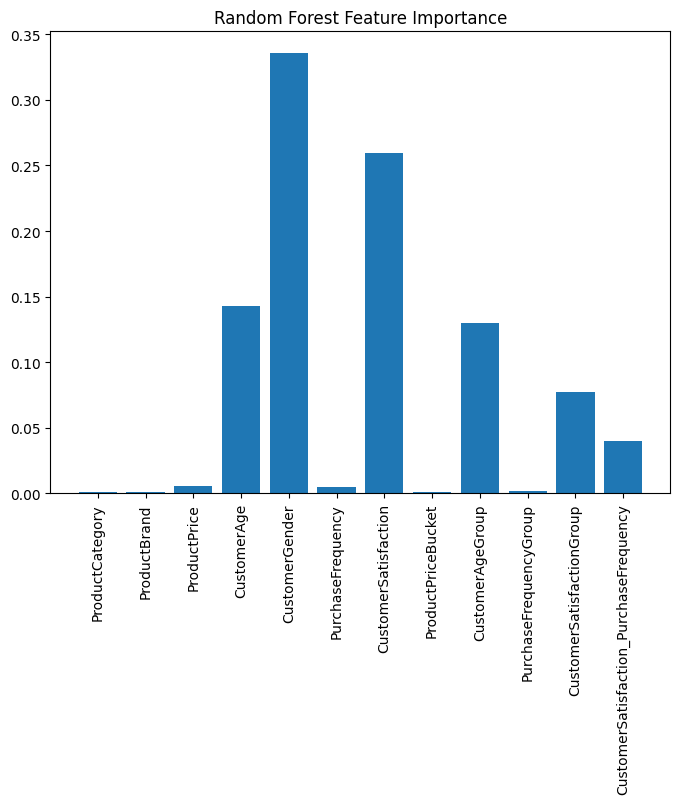

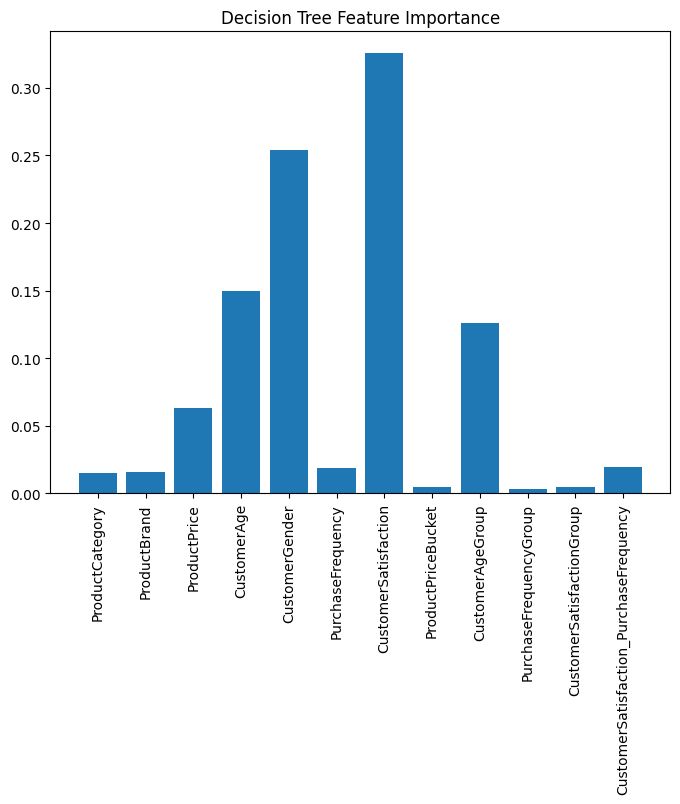

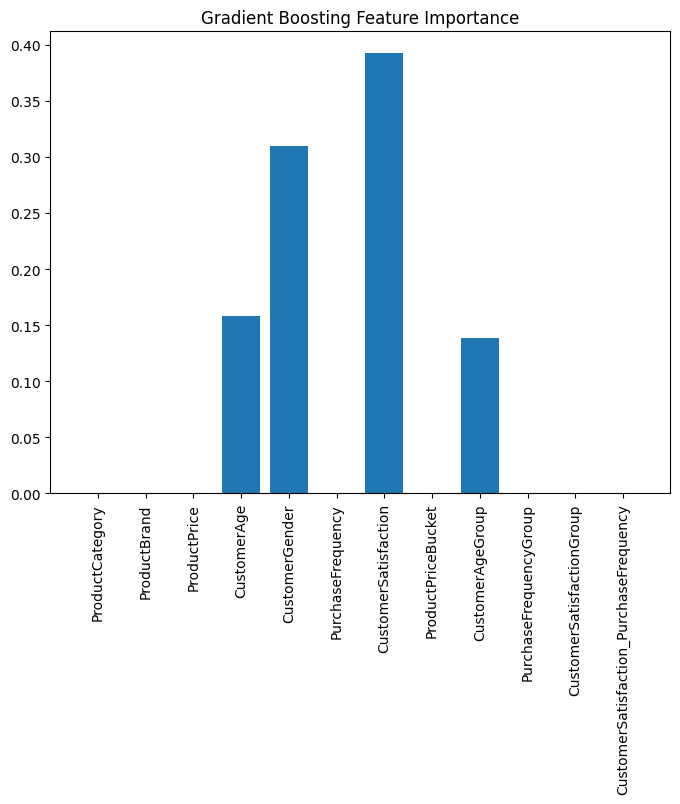

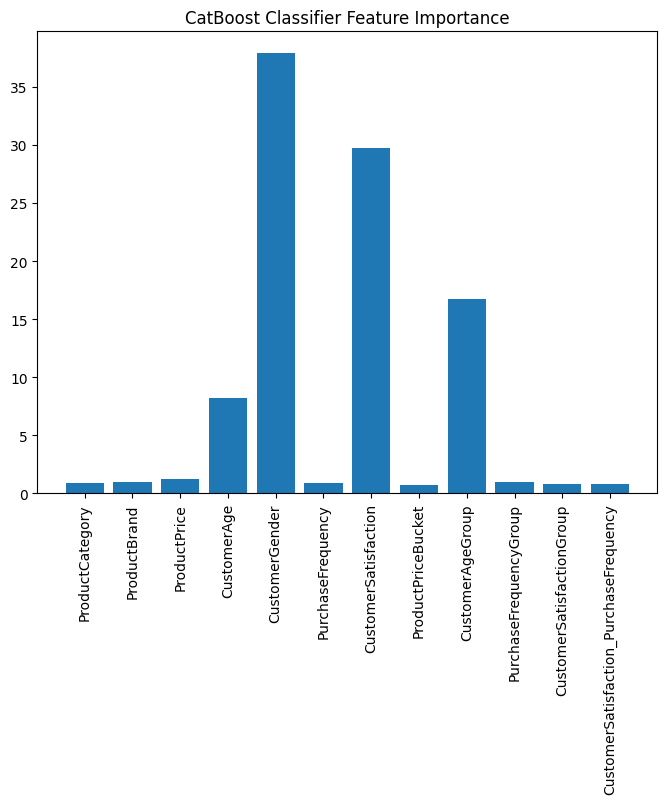

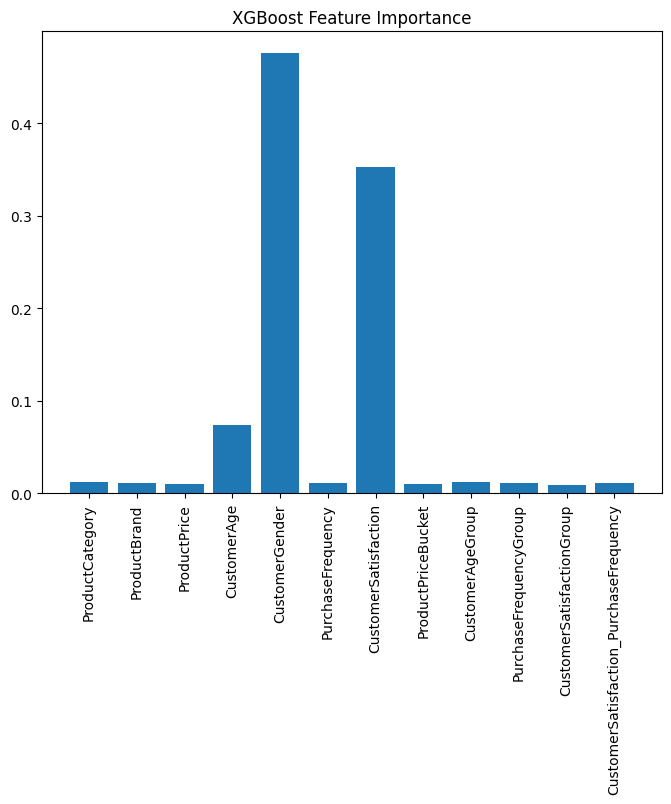

In [105]:
import matplotlib.pyplot as plt

for name, model in models.items():
    if hasattr(model,'feature_importances_'):
        feature_importances = model.feature_importances_
        plt.figure(figsize=(8,6))
        plt.bar(range(len(feature_importances)), feature_importances)
        plt.xticks(range(len(feature_importances)), X.columns, rotation=90)
        plt.title(f'{name} Feature Importance')
        plt.show()

## SAVE THE BEST MODEL (PICKLE)

In [106]:
import pickle

In [107]:
# Save the best model

best_model = models[best_model_name]
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model,f)